<H1>Activity 2: Project: UK Road Kill</H1>
<hr>
<h2>Analyst: Karl Gabriel Dellova</h2>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

In [2]:
road_kill = pd.read_csv('DATASET/uk_accident_data.csv')

In [3]:
road_kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [4]:
severity = road_kill['Accident_Severity']
date = road_kill['Accident Date']
lat = road_kill['Latitude']
lights = road_kill['Light_Conditions']
district = road_kill['District Area']
long = road_kill['Longitude']
casualty = road_kill['Number_of_Casualties']
cars = road_kill['Number_of_Vehicles']
surface = road_kill['Road_Surface_Conditions']
road = road_kill['Road_Type']
area = road_kill['Urban_or_Rural_Area'] 
weather = road_kill['Weather_Conditions']
c_type = road_kill['Vehicle_Type']

<h1>Checking Value Counts of Every Column</h1>
<hr>

In [5]:
road_kill['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [6]:
road_kill['Accident Date'].value_counts()

Accident Date
30/11/2019    704
31/01/2019    697
13/11/2021    692
13/07/2019    692
14/08/2019    688
             ... 
30/12/2022    171
25/12/2019    157
25/12/2022    145
10/01/2022    123
25/12/2020    118
Name: count, Length: 1461, dtype: int64

In [7]:
road_kill['Latitude'].value_counts()

Latitude
52.458798    50
52.949719    45
53.083165    33
52.967634    31
52.938860    29
             ..
57.374005     1
57.232273     1
57.585044     1
57.214898     1
53.590558     1
Name: count, Length: 511618, dtype: int64

In [8]:
road_kill['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [9]:
road_kill['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

In [10]:
road_kill['Longitude'].value_counts()

Longitude
-0.977611    45
-1.871043    36
-0.816789    33
-1.190861    31
-1.216694    29
             ..
-1.290893     1
-1.261295     1
-1.148217     1
-1.293355     1
-1.165232     1
Name: count, Length: 529766, dtype: int64

In [11]:
road_kill['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

In [12]:
road_kill['Number_of_Vehicles'].value_counts()

Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

In [13]:
road_kill['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
Name: count, dtype: int64

In [14]:
road_kill['Road_Type'].value_counts()

Road_Type
Single carriageway    492143
Dual carriageway       99424
Roundabout             43992
One way street         13559
Slip road               7041
Name: count, dtype: int64

In [15]:
road_kill['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
Unallocated        11
Name: count, dtype: int64

In [16]:
road_kill['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       520885
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

In [17]:
road_kill['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h1>Looking for null values</h1>
<hr>

In [18]:
road_kill.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1>Filling in Null Values</h1>
<hr>

In [19]:
road_kill['Latitude'] = road_kill['Latitude'].fillna('unknown')
road_kill['Road_Type'] = road_kill['Road_Type'].fillna('unknown')
road_kill['Road_Surface_Conditions'] = road_kill['Road_Surface_Conditions'].fillna('unknown')
road_kill['Longitude'] = road_kill['Longitude'].fillna('unknown')
road_kill['Urban_or_Rural_Area'] = road_kill['Urban_or_Rural_Area'].fillna('unknown')
road_kill['Weather_Conditions'] = road_kill['Weather_Conditions'].fillna('unknown')

In [20]:
road_kill.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h1>Changing Datatypes</h1>

In [21]:
road_kill.dtypes

Index                      object
Accident_Severity          object
Accident Date              object
Latitude                   object
Light_Conditions           object
District Area              object
Longitude                  object
Number_of_Casualties        int64
Number_of_Vehicles          int64
Road_Surface_Conditions    object
Road_Type                  object
Urban_or_Rural_Area        object
Weather_Conditions         object
Vehicle_Type               object
dtype: object

In [22]:
road_kill['Accident_Severity'] = road_kill['Accident_Severity'].astype('category')
road_kill['Light_Conditions'] = road_kill['Light_Conditions'].astype('category')
road_kill['District Area'] = road_kill['District Area'].astype('category')
road_kill['Road_Surface_Conditions'] = road_kill['Road_Surface_Conditions'].astype('category')
road_kill['Road_Type'] = road_kill['Road_Type'].astype('category')
road_kill['Urban_or_Rural_Area'] = road_kill['Urban_or_Rural_Area'].astype('category')
road_kill['Weather_Conditions'] = road_kill['Weather_Conditions'].astype('category')
road_kill['Vehicle_Type'] = road_kill['Vehicle_Type'].astype('category')

<h1>Extracting Date of Time Info</h1>
<hr>

In [23]:
road_kill['Accident Date'] = pd.to_datetime(road_kill['Accident Date'], dayfirst = True, errors = 'coerce')

In [24]:
road_kill.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                           object
Light_Conditions                 category
District Area                    category
Longitude                          object
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

In [25]:
road_kill['Year'] = road_kill['Accident Date'].dt.year
road_kill['Month'] = road_kill['Accident Date'].dt.month
road_kill['Day'] = road_kill['Accident Date'].dt.day
road_kill['DayOfWeek'] = road_kill['Accident Date'].dt.dayofweek

In [26]:
road_kill.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [27]:
road_kill['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

In [28]:
road_kill['Year'].value_counts()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64

In [29]:
road_kill['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

In [30]:
accident_19 = road_kill[(road_kill['Year'] == 2019) & (road_kill['Light_Conditions'] == 'Daylight')]
accident_19

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.49775,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
6,200701BS67207,Serious,2019-09-05,51.501405,Daylight,Kensington and Chelsea,-0.161577,1,2,Dry,Dual carriageway,Urban,Fine no high winds,Van / Goods 3.5 tonnes mgw or under,2019,9,5,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182105,2.01E+12,Slight,2019-12-14,55.028861,Daylight,Dumfries and Galloway,-3.146837,1,1,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019,12,14,5
182107,2.01E+12,Slight,2019-12-17,55.083848,Daylight,Dumfries and Galloway,-3.316981,1,2,Wet or damp,Dual carriageway,Rural,Fine no high winds,Car,2019,12,17,1
182108,2.01E+12,Fatal,2019-12-17,55.087424,Daylight,Dumfries and Galloway,-3.318665,1,2,Dry,Dual carriageway,Rural,Fine no high winds,Car,2019,12,17,1
182111,2.01E+12,Serious,2019-12-21,54.984105,Daylight,Dumfries and Galloway,-3.193693,2,1,Frost or ice,Single carriageway,Rural,Other,Car,2019,12,21,5


<h1>Q1: Which month of the year has the most accidents between the year 2019 to 2022</h1>
<hr>

<function matplotlib.pyplot.show(close=None, block=None)>

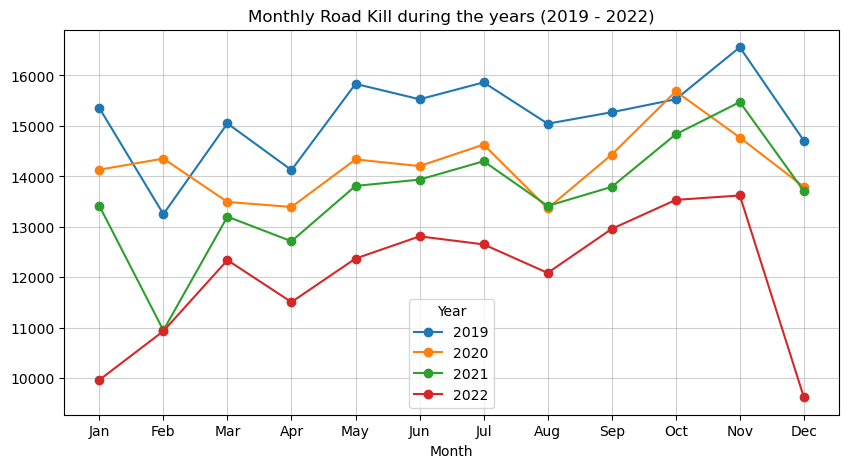

In [31]:
monthly_data = road_kill.groupby(['Year', 'Month'])['Index'].count()
monthly_data = monthly_data.unstack(level=0)
monthly_data.plot(
    marker = 'o',
    figsize = (10,5),
    title = 'Monthly Road Kill during the years (2019 - 2022)'
)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(alpha = 0.6)
plt.show

<h3>Insight 1: The year 2019 has the most car accidents durring November while the year 2022 has the least amount of car accidents in the same month</h3>
<h3>Insight 2: Both the year 2019 and 2021 are the only years with the amount of accidents dropping durring January and increasing back during Febuary</h3>
<h3>Insight 3: both the years 2019 to 2022 have decline in accidents starting at its peek in november and decreasing until january</h3>
<h3>Insight 4: the year 2020 is the year with the least fluctuations in accident rate, only drasticaly increasing durring the month of august allong with the other years</h3>

<h1>Q2: Which light level offered the most serious accident durring the year 2019</h1>
<hr>

In [32]:
accident_19 = road_kill[(road_kill['Year'] == 2019) & (road_kill['Accident_Severity'] == 'Serious')]
accident_19['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       16447
Darkness - lights lit           5460
Darkness - no lighting          2096
Darkness - lighting unknown      215
Darkness - lights unlit          104
Name: count, dtype: int64

<h3>Insight 5: The light level with the most serious accidents during 2019 is Daylight</h3>
<h3>Insight 6: A light level of darkness with no lighting has made less accidences compared to darkness with lit lighthing </h3>

<h1>Q3: Is the Urban area more prone to car accidents or the rural area during 2021?</h1>
<hr>

In [33]:
road_kill['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421663
Rural          238990
unknown            15
Unallocated        11
Name: count, dtype: int64

In [34]:
accident_21 = road_kill[road_kill['Year'] == 2021]
accident_21['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          104538
Rural           59016
Unallocated         0
unknown             0
Name: count, dtype: int64

<h3>Insight 7: The urban area is more prone to car accidents compared to the rural area with almost doubling the numbers</h3>

<h1>Q4: Which vehicle type has the least fatal accidents during 2020</h1>
<hr>

In [35]:
road_kill['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [36]:
car_type = road_kill[(road_kill['Accident_Severity'] == 'Slight') & (road_kill['Year'] == 2020)]
car_type['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      108738
Van / Goods 3.5 tonnes mgw or under        7807
Bus or coach (17 or more pass seats)       5777
Motorcycle over 500cc                      5739
Goods 7.5 tonnes mgw and over              3854
Motorcycle 125cc and under                 3503
Taxi/Private hire car                      2983
Motorcycle over 125cc and up to 500cc      1645
Motorcycle 50cc and under                  1497
Goods over 3.5t. and under 7.5t            1313
Other vehicle                              1293
Agricultural vehicle                        481
Minibus (8 - 16 passenger seats)            449
Pedal cycle                                  44
Data missing or out of range                  6
Ridden horse                                  0
Name: count, dtype: int64

<h3>Insight 8: the pedal bike the least fatal accidents during 2020</h3>

<h1>Q5: Which district are has the most car accidents during 2022 as well  as the least car accidents</h1>

In [37]:
car_district = road_kill[(road_kill['Vehicle_Type'] == 'Car') & (road_kill['Year'] == 2022)]
car_district['District Area'].value_counts()

District Area
Birmingham       2185
Leeds            1512
Cornwall         1163
Manchester       1117
Bradford         1081
                 ... 
Tynedale            0
Wansbeck            0
Vale Royal          0
Aberdeenshire       0
Aberdeen City       0
Name: count, Length: 422, dtype: int64

<h3>Insight 9: Birmingham has the most car acidents occured durring 2022</h3>
<h3>Insight 10: London airpor on the other hand has the least car acidents occured durring 2022 having 100 times less compared to Birmingham</h3>

<h1>Q6: What is the severity count of every accident in Birmingham under every road surface condition?
</h1>
<hr>

In [38]:
road_kill['Road_Surface_Conditions'].value_counts()

Road_Surface_Conditions
Dry                     447821
Wet or damp             186708
Frost or ice             18517
Snow                      5890
Flood over 3cm. deep      1017
unknown                    726
Name: count, dtype: int64

In [39]:
wet_birmingham = road_kill[(road_kill['District Area'] == 'Birmingham') & (road_kill['Road_Surface_Conditions'] == 'Wet or damp')]
wet_birmingham['Accident_Severity'].value_counts()

Accident_Severity
Slight     3284
Serious     382
Fatal        35
Name: count, dtype: int64

<h3>Insight 11: Birmingham has a fatal accident records of 35 under wet road surface condition</h3>

<h1>Q9: Which district has the most fatal record of accidents durring frozen and snowy road surface conditions</h1>
<hr>

In [40]:
frozen_fatality = road_kill[(road_kill['Road_Surface_Conditions'] == 'Frost or ice') & (road_kill['Accident_Severity'] == 'Fatal')]
frozen_fatality['District Area'].value_counts()

District Area
East Riding of Yorkshire    5
East Hertfordshire          5
Highland                    4
Cherwell                    3
Angus                       3
                           ..
Bracknell Forest            0
Braintree                   0
Berwick-upon-Tweed          0
Bexley                      0
Blackpool                   0
Name: count, Length: 422, dtype: int64

<h3>Insight 12: The district with the highest recorded fatality is between East Hertfordshire and East Riding of Yorkshire both having a fatality recording of 5</h3>
<h3>Insight 13: Majority of the other districts only has a fatality recording of 1</h3>

<h1>Q10: Which year has the least fatality record in the Leeds district under daylight light conditions</h1>
<hr>

In [41]:
day_leeds = road_kill[(road_kill['District Area'] == 'Leeds') & (road_kill['Light_Conditions'] == 'Daylight')]
day_leeds['Year'].value_counts()

Year
2019    1802
2020    1679
2021    1574
2022    1427
Name: count, dtype: int64

<h3>Insight 14: 2022 is the year with the least fatality record in the Leeds district in daylight light condition</h3>

<h1>Q11: What weather condition has the highest recorded fatality in road accidents</h1>
<hr>

In [42]:
road_kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  object        
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  object        
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

In [43]:
road_kill['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

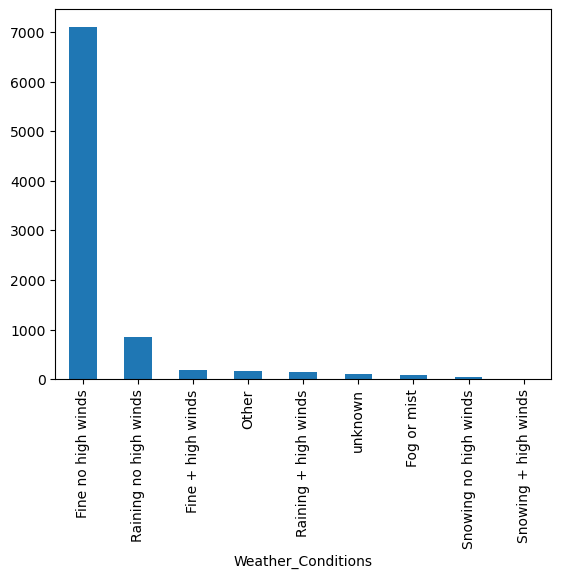

In [44]:
severe_winds = road_kill[road_kill['Accident_Severity'] == 'Fatal']
severe_winds['Weather_Conditions'].value_counts().plot(kind='bar')
plt.show()

In [45]:
severe_winds['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       7100
Raining no high winds     848
Fine + high winds         175
Other                     165
Raining + high winds      145
unknown                   107
Fog or mist                82
Snowing no high winds      36
Snowing + high winds        3
Name: count, dtype: int64

<h3>Insight 15: The weather with the highest fatality record is clear/no high winds weather condition</h3>
<h3>Insight 16: Snowing and high wind weather conditions have the least record of fatal vehicle accidents</h3>

<h1>Q12: Whats the monthly road accident record in Manchester by Year (2019 - 2022)</h1>

In [46]:
road_kill['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

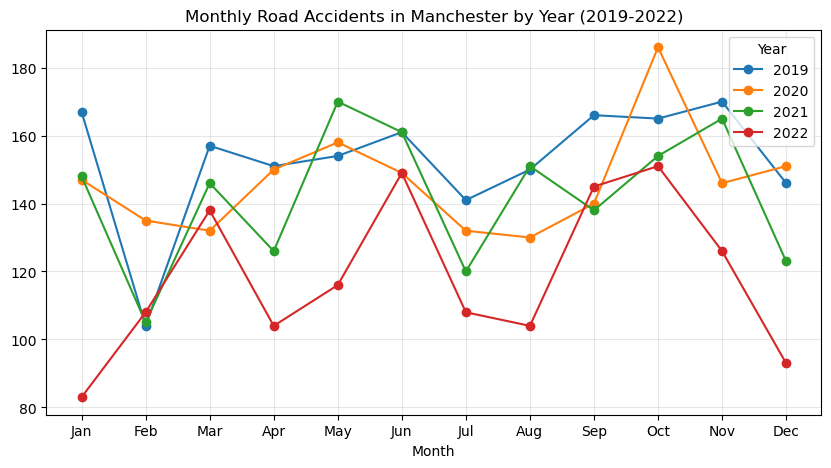

In [47]:
manchester_kill = road_kill[road_kill['District Area'] == 'Manchester']
manchester_monthly = manchester_kill.groupby(['Year', 'Month'])['Index'].count()
manchester_monthly = manchester_monthly.unstack(level=0)
manchester_monthly.plot(
                  marker='o', 
                  figsize=(10, 5),
                  title='Monthly Road Accidents in Manchester by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

<h3>Insight 17: The year 2019 has the most car accidents durring November while the year 2022 has the least amount of car accidents in the same month</h3>
<h3>Insight 18: Both 2021 and 2020 almost has the same vehicle accident record in the same month of January</h3>
<h3>Insight 19: The year 2022 is the only year where the vehicle accident rate doest decrease during the start of the year but instead increasing until the month pf march</h3>
<h3>Insight 20: Every year at the start of the month of June, the vehicle accident rate always decreases until the month of July</h3>

<h1>Q13: Which year has the least fatal vehicle accident record under rainy weather</h1>

<Axes: xlabel='Year'>

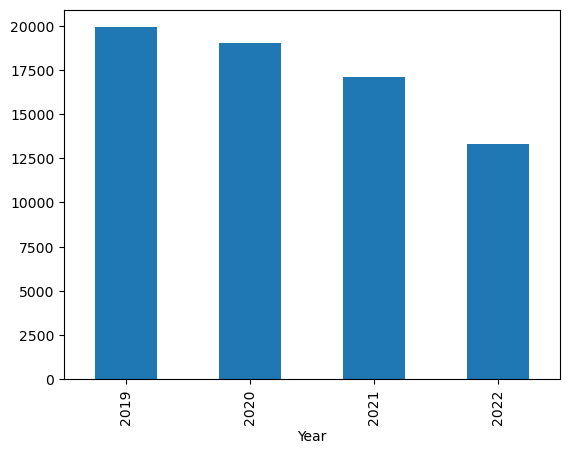

In [48]:
minor_rain = road_kill[(road_kill['Weather_Conditions'] == 'Raining no high winds')  & (road_kill['Accident_Severity'] == 'Slight')]
minor_rain.groupby('Year')['Index'].size().plot(kind='bar')

In [49]:
minor_rain['Year'].value_counts()

Year
2019    19915
2020    19047
2021    17088
2022    13330
Name: count, dtype: int64

<h3>Insight 21: The year with the least fatal record of vehicle accidents under rainy weather is 2019</h3>

<h1>Q14: Whats the Accident Severity Record Per Year</h1>

In [74]:
severity_year = road_kill.groupby(['Accident_Severity','Year'])['Index'].count()
severity_year.unstack(level=0)

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


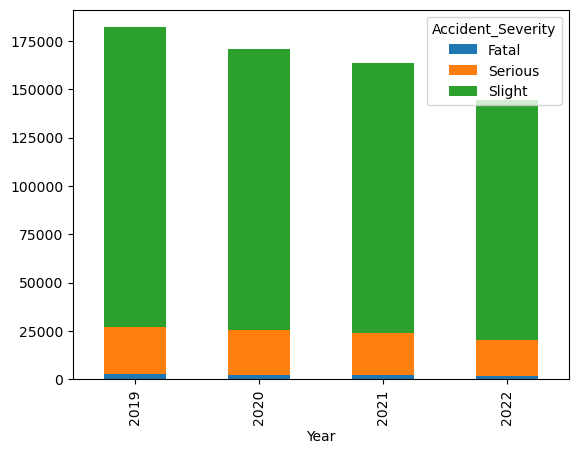

In [76]:
severity_year.unstack(level=0).plot(kind='bar', stacked=True)
plt.show()

<h1>Q15: What is the Accident Severity in Birmingham During 2022</h1>

In [53]:
birming_22 = road_kill[(road_kill['District Area'] == 'Birmingham') & (road_kill['Year'] == 2022)]
birming_22['Accident_Severity'].value_counts()

Accident_Severity
Slight     2502
Serious     346
Fatal        28
Name: count, dtype: int64

<Axes: xlabel='Accident_Severity'>

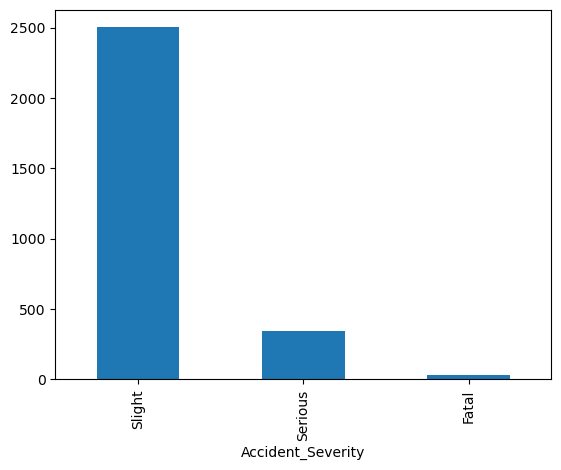

In [52]:
birming_22['Accident_Severity'].value_counts().plot(kind='bar')

<h1>Q16: What is the monthly recorded accidents in Kensington and Chelsea</h1>

In [54]:
road_kill['District Area'].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

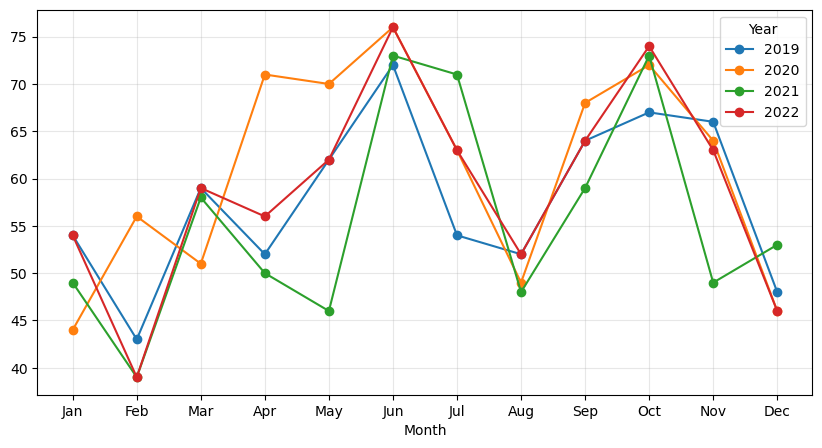

In [71]:
ken_che = road_kill[road_kill['District Area'] == 'Kensington and Chelsea']
monthly_kenche = ken_che.groupby(['Year', 'Month'])['Index'].count()

monthly_kenche = monthly_kenche.unstack(level=0)
monthly_kenche.plot(
                  marker='o', 
                  figsize=(10, 5),
                  
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()

In [ ]:
monthly_roadkill = road_kill['Month'].value_counts().sort_index()
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
